SOFT COMPUTING PROJECT USING CNN
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1040 - accuracy: 0.9675
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9729
0.08774124085903168
0.9728999733924866
INFO:tensorflow:Assets written to: handwritten_digits.model/assets
The number is probably a 7


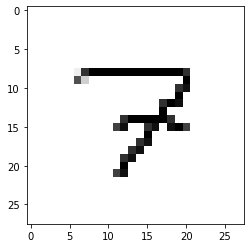

The number is probably a 2


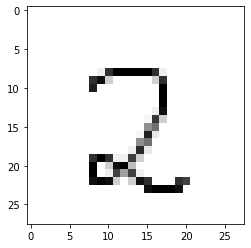

The number is probably a 9


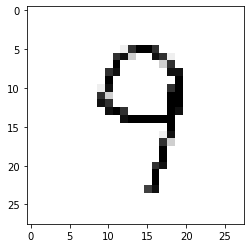

The number is probably a 8


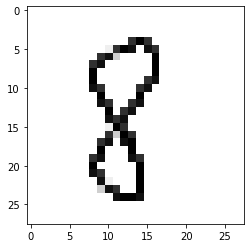

The number is probably a 5


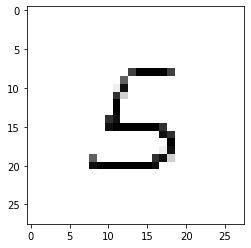

The number is probably a 6


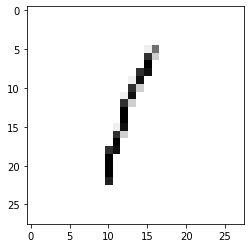

The number is probably a 1


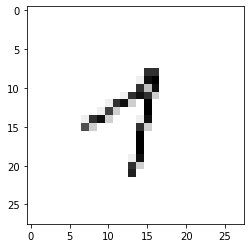

The number is probably a 6


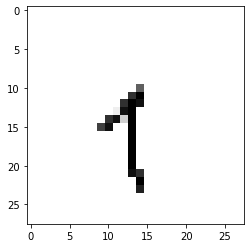

The number is probably a 7


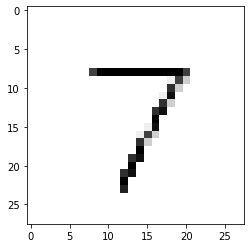

The number is probably a 7


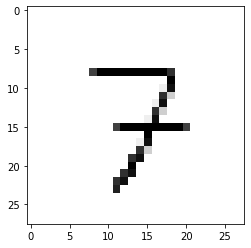

The number is probably a 0


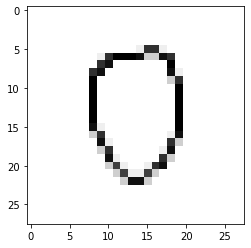

The number is probably a 1


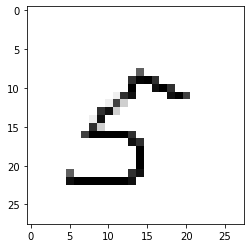

The number is probably a 3


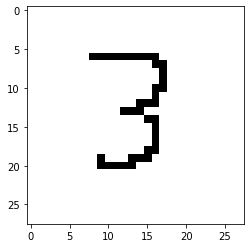

The number is probably a 2


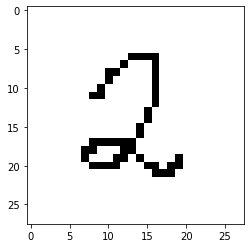

The number is probably a 1


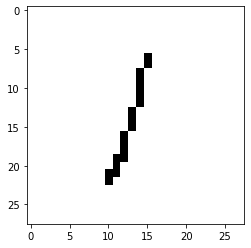

The number is probably a 7


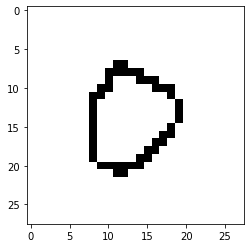

The number is probably a 9


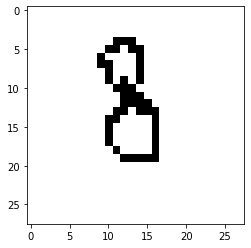

The number is probably a 7


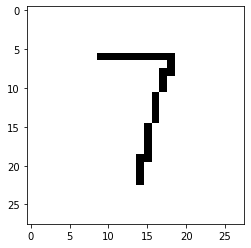

The number is probably a 9


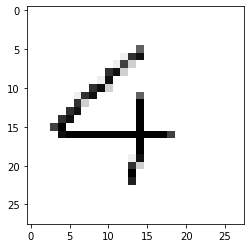

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("SOFT COMPUTING PROJECT USING CNN")
# a convolutional neural network is a class of deep neural network, most commonly applied to analyze visual imagery
# Decide if to load an existing model or to train a new one
train_new_model = True
if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # dense=all neurons are connected to the each other and so on.
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) #used to bring all the outputs connected

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=3)

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(val_loss)
    print(val_acc)

    # Saving the model
    model.save('handwritten_digits.model')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.model')

# Load custom images and predict them
image_number = 1
while os.path.isfile('digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1